In this lecture, we study the most common Python functions. 

First, we will learn a function called map(), which takes two arguments: a function and a sequence iterable (e.g. a list). This function applies to all the elements of the sequence. It returns a new list with the elements changed by the function. This function is often used with lambda expression too. 

Below we motivate the function with an example. Suppose we have a vector (list) of temperature values in Celsius and we would like to convert each element in that list to Fahrenheit. Using map() function will help us achieve our goal.

In [1]:
def fahrenheit(C):
    F=(9/5)*C+32
    return F
print(fahrenheit(0))
temp=[0, 21, 26, 31, 35]
map(fahrenheit, temp)

32.0


Notice there is a problem in the above code in the output, even though all the syntaxes are correct. If you look at the output of the map() function, the display only returns a 'map' object but not a list. This is because in Python 3+, many processes that iterate over iterables return iterators themselves. In most cases, this ends up saving memory, and should make things go faster. You will not encounter the problem in Python 2-. In other words, if you type the above command in Python 2, you will get a list. 

Since we are in the Python 3 world, let's modify our code so that the result of the map function is a list. This is easy, all we have to do is to put everything in a list() function. 

In [2]:
temp2=list(map(fahrenheit, temp))
print(temp2)
temp3 = ["%.2f" % element for element in temp] # list comprehension helps formatting our results
print(temp3)

[32.0, 69.80000000000001, 78.80000000000001, 87.80000000000001, 95.0]
['0.00', '21.00', '26.00', '31.00', '35.00']


The map() function can also be used in conjunction with the lambda expression. This is very useful when your function is extremely simple. 

In [3]:
list(map(lambda C: (9/5)*C+32, temp))

[32.0, 69.80000000000001, 78.80000000000001, 87.80000000000001, 95.0]

You can also use the lambda expression with more than one argument together with the map(). This is not recommended for beginners but notice the power of the map() function. 

In [4]:
a=[1,2,3]
b=[4,5,6]
list(map(lambda x,y: x+y, a, b))

[5, 7, 9]

If you come from a background with R as a statistician, then you will notice that the map() function is very similar to the lapply() function in R. 

Let's have another example. Suppose I have a string of text from Shakespeare and I would like to know the average length of each word used in the string. Below is the code to achieve our goal:

In [5]:
Shakespeare="Shall I compare thee to a summer's day? Thou art more lovely and more temperate."
Shakespeare2=Shakespeare.split()
print(Shakespeare2)
def wordroughcount(l):
    return len(l)
tot=list(map(wordroughcount, Shakespeare2))
print(tot)
import numpy
print('Avg word length used is: ' + str(numpy.mean(tot)))
    

['Shall', 'I', 'compare', 'thee', 'to', 'a', "summer's", 'day?', 'Thou', 'art', 'more', 'lovely', 'and', 'more', 'temperate.']
[5, 1, 7, 4, 2, 1, 8, 4, 4, 3, 4, 6, 3, 4, 10]
Avg word length used is: 4.4


We now go over the next function called reduce(). This function with the syntax reduce(function, sequence) continually applies the function to the sequence. It then returns a single value.

If seq = [ s1, s2, s3, ... , sn ], calling reduce(function, sequence) works like this: 1) At first the first two elements of seq will be applied to function, i.e. func(s1,s2). 2) The list on which reduce() works looks now like this: [function(s1, s2), s3, ... , sn]. 3) In the next step the function will be applied on the previous result and the third element of the list, i.e. function(function(s1, s2),s3). 4) The list looks like this now: [function(function(s1, s2),s3), ... , sn]. 5) It continues like this until just one element is left and return this element as the result of reduce().

Lets see an example below. Notice that the reduce() function used to be already in the package. These days this function is moved to the 'functools' module. 

In [6]:
from functools import reduce
blah=[47,11,42,13]
reduce(lambda x,y: x+y, blah)

113

Lets look at a diagram to get a better understanding of what is going on here:

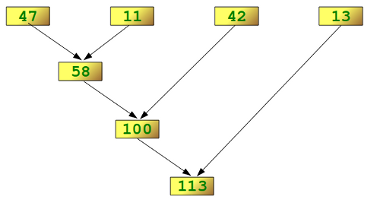

In [7]:
from IPython.display import Image
Image('http://www.python-course.eu/images/reduce_diagram.png')

Now let's study our third function called filter(). This function filter(function, list) offers a convenient way to filter out all the elements of an iterable, for which the function returns 'True'. The first argument of filter() must be a function. The result of filter() creates a list of elements for which a function returns true. This function will be applied to every element of the iterable. 

Lets see some examples. Suppose we have a function that checks whether a number is even. Now let's filter a list of numbers. Note: putting the function into filter without any parenthesis might feel strange, but keep in mind that functions are objects as well. 

In [3]:
#First let's make a function
def even_check(num):
    if num%2 ==0:
        return True
ourlist=range(7)
print(list(ourlist))
print(list(filter(even_check,ourlist))) # [0,2,4,6]

[0, 1, 2, 3, 4, 5, 6]
[0, 2, 4, 6]


The filter() function is very similar to the map() function in the sense that it stores its output as a 'filter' object and it can take on lambda expressions. Below is another example:

In [9]:
list(filter(lambda x: x>4,ourlist))

[5, 6]

As another example, suppose we have a text string and we interested in picking out any words that contain 'th' in it using the filter() function. We also want to further count how many unique words are there that contains 'th'. Below is the code:

In [10]:
Shakespeare3="When I do count the clock that tells the time And see the brave day sunk in hideous night"
s=Shakespeare3.split()
def wordfilter(st):
    if 'th' in st:
        return st
    else:
        pass
th=list(filter(wordfilter, s))
print(th)
print('word frequency in a dictionary: \n' + str(dict((i,th.count(i)) for i in set(th))))

['the', 'that', 'the', 'the']
word frequency in a dictionary: 
{'the': 3, 'that': 1}


Next, we move on to studying the function zip(). The zip() function makes an iterator that aggregates elements from each of the iterables and returns an iterator of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables. The iterator stops when the shortest input iterable is exhausted. With a single iterable argument, it returns an iterator of 1-tuples. With no arguments, it returns an empty iterator. The function is very similar to the map() function and reduce() function in the sense that the direct output of the zip() function is a 'zip'-specific object. 

This function is a bit hard to understand on a cursory look. Let's see an example:

In [11]:
x=[1,9,3]
y=[4,8,6]
tuple(zip(x,y)) 
list(zip(x,y))

[(1, 4), (9, 8), (3, 6)]

In [12]:
for j in zip(x,y):
    print(max(j))

4
9
6


Note how tuples are returned for the example above. What if one iterable is longer than the other? In this case, how zip() is defined by the shortest iterable length. Therefore, it is generally advised not to zip unequal length iterables unless your very sure you only need partial tuple pairings.

In [13]:
z=[1,2,3,4,5,6]
tuple(zip(y,z))

((4, 1), (8, 2), (6, 3))

We can also zip together two dictionaries. In this case, some magic will show up. If you mechanically zip two dictionaries, then only the keys will be kept. However, if you modify the code using an associated method called values(), what will happen essentially is that the keys in the first dictionary and the values in the second dictionary are 'zipped up' together. Below is an example. Notice that simply iterating through the dictionaries will result in just the keys. We would have to call methods to mix keys and values if we want to mesh the keys and values together. 

In [4]:
d1 = {'a':1,'b':2}
d2 = {'c':4,'d':5}
print(list(zip(d1,d2)))
print(list(zip(d2,d1)))

[('a', 'c'), ('b', 'd')]
[('c', 'a'), ('d', 'b')]


In [15]:
print(dict(zip(d2,d1.values())))
print(dict(zip(d1,d2.values())))

{'c': 1, 'd': 2}
{'a': 4, 'b': 5}


Next, we will learn another function called enumerate(). This function allows you to keep a count as you iterate through an object. It does this by returning a tuple in the form (count,element). The output of the function is an 'enumerate' object, so you will have to change it to a list or a tuple etc. for display purposes in many applications. The enumerate() function becomes particularly useful when you have a case where you need to have some sort of tracker. 

In [16]:
letter = ['a','b','c']
print(list(enumerate(letter)))
for number,item in enumerate(letter):
    print(number, item)

[(0, 'a'), (1, 'b'), (2, 'c')]
0 a
1 b
2 c


Another common useful function we want to cover here is isinstance(). This built-in Python function checks if an object is of a given type. Here are some examples:

In [2]:
isinstance(2.0, (int))

False

Let's do an exercise by creating a function to calculate the Gini coefficients, which are often used in inequality studies in economics. The Gini coefficients calculation can be validated here: http://www.shlegeris.com/gini and Wikipedia has a general formula to calculate the Gini coefficients.

In [1]:
data=[0.5, 0.5, 9, 12.5, 3.87, 6.12, 45.801]

def Gini(data):
    if isinstance(data, list) is True: # if the data feeds are list in nature, then perform the following task...
        numer=sum([abs(x-y) for i,x in enumerate(data) for j,y in enumerate(data) if i!=j]) # calculating pairwise difference
        denom=2*len(data)*sum(data)
        Gini=numer/denom
        return Gini
    else:
        print('Error! The data you feed into this function has to be a list object')
        
Gini(data)

0.6022695547928334

Now let's move onto another two functions. The all() and any() are built-in functions in Python that allow us to conveniently check for boolean matching in an iterable. Here, all() will return 'True' if all elements in an iterable are True, and any() will return 'True' if any of the elements in the iterable are 'True'. The two functions are logically equivalent to the user-defined functions below all2() and any2() defined below:

In [17]:
def all2(iterable):
    for element in iterable:
        if not element:
            return False
    return True
def any2(iterable):
    for element in iterable:
        if element:
            return True
    return False
logic_list=[True, True, False]
print(all(logic_list)) # False
print(all2(logic_list)) # False
print(any(logic_list)) # True
print(any2(logic_list)) # True

False
False
True
True


Now let's study a weird function called object(). This function accepts no input and it returns a featureless object which is a base for all classes. Here is an example. In the program below, we used built-in functions type() and dir() to get type and all attributes of the object respectively:

In [4]:
test = object()

print(type(test),'\n')
print(dir(test))

<class 'object'> 

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


This function is not that intuitive, but it will become useful when it comes OOP and some advanced data types. It essentially gives us the most basic method for all classes. These are useful for software engineers. We will not elaborate them here any more.

Python has a lot of built-in functions that pertains to concept of OOP and data conversion. An example is the int() function, which returns an integer object from any number or string:

In [7]:
print(int(123.23))
print(int('123'))

123
123
